### <font color='blue'> We want numerical feature vectors with a fixed size rather than the raw text documents with variable length </font>



## Setup

In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

## About the Twitter dataset
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

In a local computer however, you can download the data by doing:

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Tigran\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


We can see that the data is stored in a list and as you might expect, individual tweets are stored as strings.

You can make a more visually appealing report by using Matplotlib's [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html) library. Let us see how to create a [pie chart](https://matplotlib.org/3.2.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py) to show the same information as above. This simple snippet will serve you in future visualizations of this kind of data.

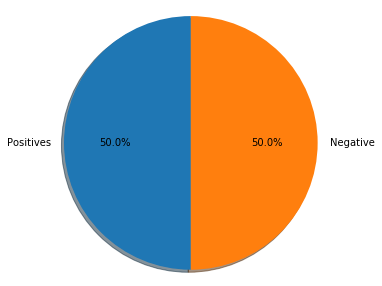

In [5]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

## Looking at raw texts

Before anything else, we can print a couple of tweets from the dataset to see how they look. Understanding the data is responsible for 80% of the success or failure in data science projects. We can use this time to observe aspects we'd like to consider when preprocessing our data.

Below, you will print one random positive and one random negative tweet. We have added a color mark at the beginning of the string to further distinguish the two. (Warning: This is taken from a public dataset of real tweets and a very small portion has explicit content.)

In [6]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@nechantya hi please do check our final design :) https://t.co/EXt098Yq1b
There's totally no stomping at all :(


# Text Preprocessing

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

Let's see how we can do these to a given tweet. We will choose just one and see how this is transformed by each preprocessing step.

In [7]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [8]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tigran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

### Remove hyperlinks,  Twitter marks and styles

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the [re](https://docs.python.org/3/library/re.html) library to perform regular expression operations on our tweet. We'll define our search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

In [12]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
#tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) module from NLTK allows us to do these easily:

In [13]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [14]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [15]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.
 
NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). Let's see how we can use it in the cell below.

In [16]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [17]:
from nltk.tokenize import  word_tokenize
import nltk
#nltk.download()
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tigran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## text_prep()

In [9]:
import re
import string
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#from nltk.tokenize import TweetTokenizer
from nltk.tokenize import  word_tokenize

def text_prep(text):
    """Process string function.
    Input:
        text: a string containing a text
    Output:
        texts_clean: a list of words containing the processed text

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    
    # remove stock market tickers like $GE
    #tweet = re.sub(r'\$\w*', '', tweet)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove old style retweet text "RT"
    text = re.sub(r'^RT[\s]+', '', text)
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)
    
    # tokenize text
    text_tokens = word_tokenize(text)

    texts_clean = []
    for word in text_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            texts_clean.append(stem_word)

    return texts_clean

# 1. Bag of Words Representation

### Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [17]:
# Let’s start by defining a corpus of a few different sample text messages.

messages = ["Hey hey hey lets go get lunch today :)",
           "Did you go home?",
           "Hey!!! I need a favor"]

## CountVectorizer


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [20]:
vect.fit(messages)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [4]:
vect.get_feature_names()

['did',
 'favor',
 'get',
 'go',
 'hey',
 'home',
 'lets',
 'lunch',
 'need',
 'today',
 'you']

In [22]:
# The sparse representation
dtm = vect.transform(messages)
repr(dtm)
print(dtm)

  (0, 2)	1
  (0, 3)	1
  (0, 4)	3
  (0, 6)	1
  (0, 7)	1
  (0, 9)	1
  (1, 0)	1
  (1, 3)	1
  (1, 5)	1
  (1, 10)	1
  (2, 1)	1
  (2, 4)	1
  (2, 8)	1


In [23]:
# The representation in pandas dataframe
import pandas as pd
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

,did,favor,get,go,hey,home,lets,lunch,need,today,you
0,0,0,1,1,3,0,1,1,0,1,0
1,1,0,0,1,0,1,0,0,0,0,1
2,0,1,0,0,1,0,0,0,1,0,0


In [8]:
# If you got another message soon after you created your document term matrix and want to add it in. 
new_message = ['Hey lets go get a drink tonight']
new_dtm = vect.transform(new_message)
pd.DataFrame(new_dtm.toarray(), columns=vect.get_feature_names())

,did,favor,get,go,hey,home,lets,lunch,need,today,you
0,0,0,1,1,1,0,1,0,0,0,0


## TfidfVectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
def createDTM(messages):
    vect = TfidfVectorizer()
    dtm = vect.fit_transform(messages) # create DTM
    
    # create pandas dataframe of DTM
    return pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

In [39]:
messages = ["Hey lets get lunch :)",
           "Hey!!! I need happen happiness a favor"]
createDTM(messages)

,favor,get,happen,happiness,hey,lets,lunch,need
0,0.000000,0.534046,0.000000,0.000000,0.379978,0.534046,0.534046,0.000000
1,0.471078,0.000000,0.471078,0.471078,0.335176,0.000000,0.000000,0.471078


In [ ]:
# Some arguments to consider
# max_features = n : only considers the top n words orderd by term frequency
# min_df = n : ignores words with a document frequency below n
# max_df = n : ignores words with a document frequency above n
# stop_words = [’ ‘] : ignores common words like 'the', 'that', 'which', etc. 
#You’ll need to define in a list what words you want to include. There are lists of 
#common stop words available online, the NLTK library also has a list of stop words built into it.

In [40]:
corpus = [
     'This is the first document.',
     'This  is  happy the second document.',
    'And this is the third one.',
    'Is this the first document?']

In [10]:
# implement tfidf function on the preprocessed text
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer = text_prep)
#X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

NameError: name 'corpus' is not defined

In [6]:
tfidf_tokens = vectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = X.toarray(), columns = tfidf_tokens)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

NameError: name 'vectorizer' is not defined

In [14]:
# an example on pdf file
#import textract
#text = textract.process("C:\\Users\\Tigran\\Desktop\\AutoML\\notebooks\\monetary.pdf")
text1 = textract.process("C:\\Users\\Tigran\\Desktop\\AutoML\\data\\text\\multi.pdf")

In [15]:
text1

b'A Comparison of Event Models for Naive Bayes Text Classification\r\nAndrew McCallum\xe2\x80\xa1\xe2\x80\xa0\r\n\r\nKamal Nigam\xe2\x80\xa0\r\n\r\nmccallum@justresearch.com\r\n\xe2\x80\xa1\r\nJust Research\r\n4616 Henry Street\r\nPittsburgh, PA 15213\r\n\r\nknigam@cs.cmu.edu\r\n\r\nAbstract\r\nRecent approaches to text classification have used two\r\ndifferent first-order probabilistic models for classification, both of which make the naive Bayes assumption.\r\nSome use a multi-variate Bernoulli model, that is, a\r\nBayesian Network with no dependencies between words\r\nand binary word features (e.g. Larkey and Croft 1996;\r\nKoller and Sahami 1997). Others use a multinomial\r\nmodel, that is, a uni-gram language model with integer\r\nword counts (e.g. Lewis and Gale 1994; Mitchell 1997).\r\nThis paper aims to clarify the confusion by describing\r\nthe differences and details of these two models, and by\r\nempirically comparing their classification performance\r\non five text corpora.

In [11]:
x = vectorizer.fit_transform(txt)

In [2]:
print(text)

b"DISCOUNT AND ADVANCE RATES -- Requests by twelve Reserve Banks to\r\nmaintain the existing primary credit rate; requests to renew the secondary and\r\nseasonal credit formulas.\r\n\r\nExisting rate and formulas approved.\r\nOctober 5, 2020.\r\n\r\nToday, Board members discussed economic and financial developments and\r\nissues related to possible policy actions. In connection with this discussion, Board\r\nmembers considered discounts and advances under the primary credit program (the\r\nprimary credit rate) and discussed, on a preliminary basis, their individual assessments\r\nof the appropriate rate and its communication, which would be discussed at the next\r\njoint meeting of the Board and the Federal Open Market Committee.\r\nSubject to review and determination by the Board of Governors, the directors\r\nof the Federal Reserve Banks of New York, Cleveland, Richmond, Atlanta, Chicago,\r\nKansas City, and Dallas had voted on September 24, 2020, and the directors of the\r\nFederal 

In [13]:
import pandas as pd
tfidf_tokens = vectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = x.toarray(), columns = tfidf_tokens)
print("\nTD-IDF Vectorizer\n")
df_tfidfvect


TD-IDF Vectorizer



,'s,--,across,action,activ,advanc,affect,also,applic,appropri,...,two,uncertainti,unchang,urban,vari,vice,vote,week,would,york
0,0.093704,0.031235,0.010412,0.083293,0.010412,0.093704,0.010412,0.052058,0.031235,0.031235,...,0.031235,0.020823,0.031235,0.010412,0.010412,0.06247,0.083293,0.041646,0.093704,0.020823
1,0.093704,0.031235,0.010412,0.083293,0.010412,0.093704,0.010412,0.052058,0.031235,0.031235,...,0.031235,0.020823,0.031235,0.010412,0.010412,0.06247,0.083293,0.041646,0.093704,0.020823



# 2. Word Embeddings

Use them for:
* Information extraction/transfer learning
* Measure similarity (e.g. cosine) between words/clustering
* Analogies
* Machine Translation
* Question Answering

Algorithms:
* Words: Word2vec, Glove, FastText, etc.
* Sentences: Doc2vec, etc. 

There are pretrained models

# 3. Image Preprocessing

Microscope image of an iPhone screen.

<img src="iphone-microscope.jpg" style="width:200px;height:50;">

In computer science, an image is represented by a 3D array of shape $(length, height, depth = 3)$. However, when you read an image as the input of an algorithm you convert it to a vector of shape $(length*height*3, 1)$. In other words, you "unroll", or reshape, the 3D array into a 1D vector.

<img src="image2vector.png" style="width:500px;height:300;">

In [1]:
import numpy as np

def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    
    length, height, depth = image.shape
    v = image.reshape((length * height * depth, 1))   
    
    return v

In [9]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]
